In [8]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [9]:
# Particle Swarm Optimization Inertia Weight
def PSO_convergence(problem, MaxIter = 2000, PopSize = 32,w=0,c1=0,c2=0,rosen=False):

    # Empty Particle Template
    empty_particle = {
        'position': None,
        'velocity': None,
        'cost': None,
        'best_position': None,
        'best_cost': None,
    };

    # Extract Problem Info
    CostFunction = problem['CostFunction'];
    VarMin = problem['VarMin'];
    VarMax = problem['VarMax'];
    nVar = problem['nVar'];
    VMax = problem['VMax'];

    # Initialize Global Best
    gbest = {'position': None, 'cost': np.inf};

    # Create Initial Population
    
    pop = [];
    watch=[]
    init_pos=[]
    total=[]
    np.random.seed(23451)
    for i in range(0, PopSize):
        pop.append(empty_particle.copy());
        pop[i]['position'] = np.random.uniform(VarMin, VarMax, nVar);
        pop[i]['velocity'] = np.zeros(nVar);
        pop[i]['cost'] = CostFunction(pop[i]['position']);
        pop[i]['best_position'] = pop[i]['position'].copy();
        pop[i]['best_cost'] = pop[i]['cost'];
        init_pos.append(pop[i]['position'].copy())
        
        if pop[i]['best_cost'] < gbest['cost']:
            gbest['position'] = pop[i]['best_position'].copy();
            gbest['cost'] = pop[i]['best_cost'];
 
    # PSO Loop
    delta_avg_list=[]
    delta_max_list=[]
    delta_max_50=[]
    pop_final=[]
    for it in range(0, MaxIter):
       
        for i in range(0, PopSize):
            
            pop[i]['velocity'] = w*pop[i]['velocity'] \
                + c1*np.random.rand(nVar)*(pop[i]['best_position'] - pop[i]['position']) \
                + c2*np.random.rand(nVar)*(gbest['position'] - pop[i]['position']);
            
            pop[i]['position'] += pop[i]['velocity'];
            #Setting Vamx
            pop[i]['velocity'] = np.maximum(pop[i]['velocity'], -VMax);
            pop[i]['velocity'] = np.minimum(pop[i]['velocity'], VMax);
            
            pop[i]['cost'] = CostFunction(pop[i]['position']);
            
            if pop[i]['cost'] < pop[i]['best_cost']:
                pop[i]['best_position'] = pop[i]['position'].copy();
                pop[i]['best_cost'] = pop[i]['cost'];

        for i in range(0, PopSize):
            if pop[i]['best_cost'] < gbest['cost']:
                gbest['position'] = pop[i]['best_position'].copy();
                gbest['cost'] = pop[i]['best_cost']; 


        # saving observation every loop
        if it % 1 == 0:
            velocity_temp=[]
            position_temp=[]
            delta_avg=0
            delta_max=0

            for i in range(0, PopSize):
                velocity_temp.append(pop[i]['velocity'].copy())
                position_temp.append(pop[i]['position'].copy())
                if rosen == True:
                    delta_max=max(delta_max,np.linalg.norm(position_temp[i]-np.ones(nVar)))
                else:
                    delta_max=max(delta_max,np.linalg.norm(position_temp[i]))
                delta_avg=delta_avg+np.linalg.norm(velocity_temp[i])

            delta_avg=delta_avg/PopSize

    
            delta_avg_list.append(delta_avg)
            delta_max_list.append(delta_max)
        
        # saving last 50 observation
        if it > 99949:
            delta_max=0
            position_temp=[]
            for i in range(0, PopSize):
                position_temp.append(pop[i]['position'].copy())
                if rosen == True:
                    delta_max=max(delta_max,np.linalg.norm(position_temp[i]-np.ones(nVar)))
                else:
                    delta_max=max(delta_max,np.linalg.norm(position_temp[i]))
            delta_max_50.append(delta_max)
    
    # saving final position
    if it == 99999:
        for i in range(0,PopSize):
            pop_final.append(pop[i]['position'].copy())
                
    return [delta_avg_list,delta_max_list,delta_max_50,pop_final]


In [4]:

def Sphere(x):
    return sum(x**2);

def Rastrigrin(x):
    return sum(x**2 - 10*np.cos(2*math.pi*x)+10)

def Rosenbrock(x):
    return sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0) 
    #np.sum(100*(x.T[1:]-x.T[:-1]**2)**2 + (x.T[:-1]-1)**2, axis=0)
    
def prod(iterable):
    return reduce(operator.mul, iterable, 1)

def Griewank(xs):
    sum = 0
    for x in xs:
        sum += x * x
        product = 1
    for i in range(len(xs)):
        product *= math.cos(float(xs[i]) / math.sqrt(i + 1))
    return 1 + sum / 4000 - product
    
def Schaffer(x):
    x_ = x[0]
    y_ = x[1]
    j = 0.5 + ((np.sin(math.sqrt(x_ ** 2.0 + y_ ** 2.0))) ** 2.0 - 0.5)/((1 + 0.001 * (x_ ** 2.0 + y_ ** 2.0)) ** 2.0)
    return j

In [5]:
sphere_problem = {
        'CostFunction': Sphere,
        'nVar': 10,
        'VarMin': -100,   # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VarMax': 100,    # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VMax': 100
    };

rosenbrock_problem = {
        'CostFunction': Rosenbrock,
        'nVar': 10,
        'VarMin': -100,   # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VarMax': 100,    # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VMax': 100
    };

schaffer_problem = {
        'CostFunction': Schaffer,
        'nVar': 2,
        'VarMin': -100,   # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VarMax': 100,    # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VMax': 100
    };

rastrigin_problem = {
        'CostFunction': Rastrigrin,
        'nVar': 10,
        'VarMin': -5.12,   # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VarMax': 5.12,    # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VMax': 5.12
    };

griewank_problem = {
        'CostFunction': Griewank,
        'nVar': 10,
        'VarMin': -600,   # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VarMax': 600,    # Alternatively you can use a "numpy array" with nVar elements, instead of scalar
        'VMax': 600
    };



## Cases

In [6]:
sphere_0444=PSO_convergence(sphere_problem, MaxIter = 100000, PopSize = 32, w=0.4, c1=2.2,c2=2.2,rosen=False)
rastrigin_0444=PSO_convergence(rastrigin_problem, MaxIter = 100000, PopSize = 32, w=0.4, c1=2.2,c2=2.2,rosen=False)
rosenbrock_0444=PSO_convergence(rosenbrock_problem, MaxIter = 100000, PopSize = 32, w=0.4, c1=2.2,c2=2.2,rosen=True)
griewank_0444=PSO_convergence(griewank_problem, MaxIter = 100000, PopSize = 32, w=0.4, c1=2.2,c2=2.2,rosen=False)
schaffer_0444=PSO_convergence(schaffer_problem, MaxIter = 100000, PopSize = 32, w=0.4, c1=2.2,c2=2.2,rosen=False)

In [7]:
sphere_0938=PSO_convergence(sphere_problem, MaxIter = 100000, PopSize = 32, w=0.9, c1=1.9,c2=1.9,rosen=False)
rastrigin_0938=PSO_convergence(rastrigin_problem, MaxIter = 100000, PopSize = 32, w=0.9, c1=1.9,c2=1.9,rosen=False)
rosenbrock_0938=PSO_convergence(rosenbrock_problem, MaxIter = 100000, PopSize = 32, w=0.9, c1=1.9,c2=1.9,rosen=True)
griewank_0938=PSO_convergence(griewank_problem, MaxIter = 100000, PopSize = 32, w=0.9, c1=1.9,c2=1.9,rosen=False)
schaffer_0938=PSO_convergence(schaffer_problem, MaxIter = 100000, PopSize = 32, w=0.9, c1=1.9,c2=1.9,rosen=False)

In [8]:
sphere_1012=PSO_convergence(sphere_problem, MaxIter = 100000, PopSize = 32, w=1, c1=0.6,c2=0.6,rosen=False)
rastrigin_1012=PSO_convergence(rastrigin_problem, MaxIter = 100000, PopSize = 32, w=1, c1=0.6,c2=0.6,rosen=False)
rosenbrock_1012=PSO_convergence(rosenbrock_problem, MaxIter = 100000, PopSize = 32, w=1, c1=0.6,c2=0.6,rosen=True)
griewank_1012=PSO_convergence(griewank_problem, MaxIter = 100000, PopSize = 32, w=1, c1=0.6,c2=0.6,rosen=False)
schaffer_1012=PSO_convergence(schaffer_problem, MaxIter = 100000, PopSize = 32, w=1, c1=0.6,c2=0.6,rosen=False)

In [12]:
def plot_printing_100000(file,fn_name):
    plt.figure(figsize=(20,8))
    plt.plot(file[0])
    plt.title("{} $\Delta_{{avg}}$ Trajectory of 100,000 Iterations, (w,$c_1 + c_2$)= (0.9,3.8)".format(fn_name))
    plt.xlabel("nth Iteration")
    plt.ylabel("$\Delta_{avg}$ Value")


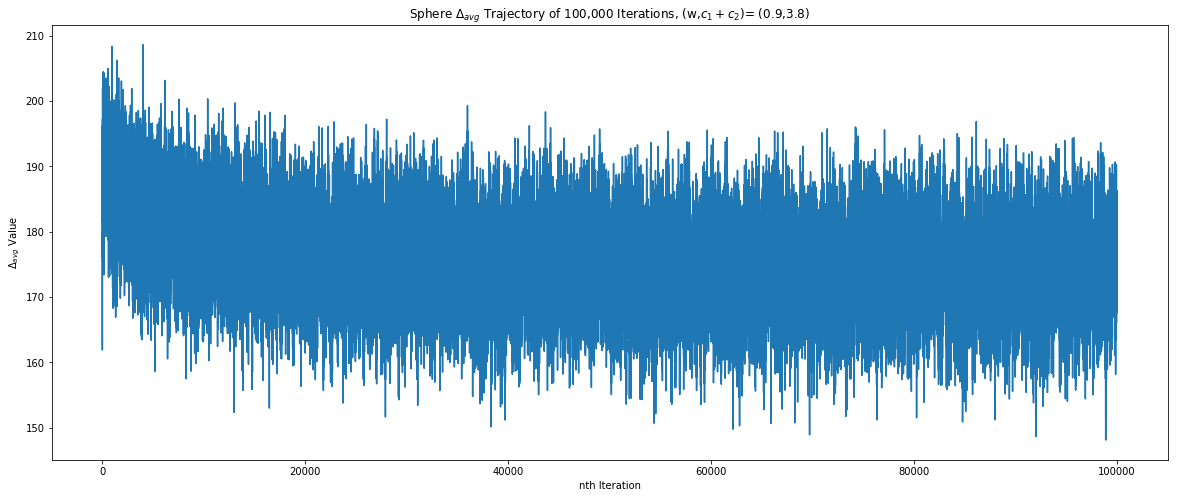

In [13]:
plot_printing_100000(sphere_0938,"Sphere")

In [14]:
def plot_printing_last_1000(file,fn_name):
    plt.figure(figsize=(20,8))
    plt.plot(np.array(range(99000,100000)),file[0][99000:])
    plt.title("{} $\Delta_{{avg}}$ Last 1000 Iterations, (w,$c_1 + c_2$)= (0.9,3.8)".format(fn_name))
    plt.xlabel("nth Iteration")
    plt.ylabel("$\Delta_{avg}$ Value")


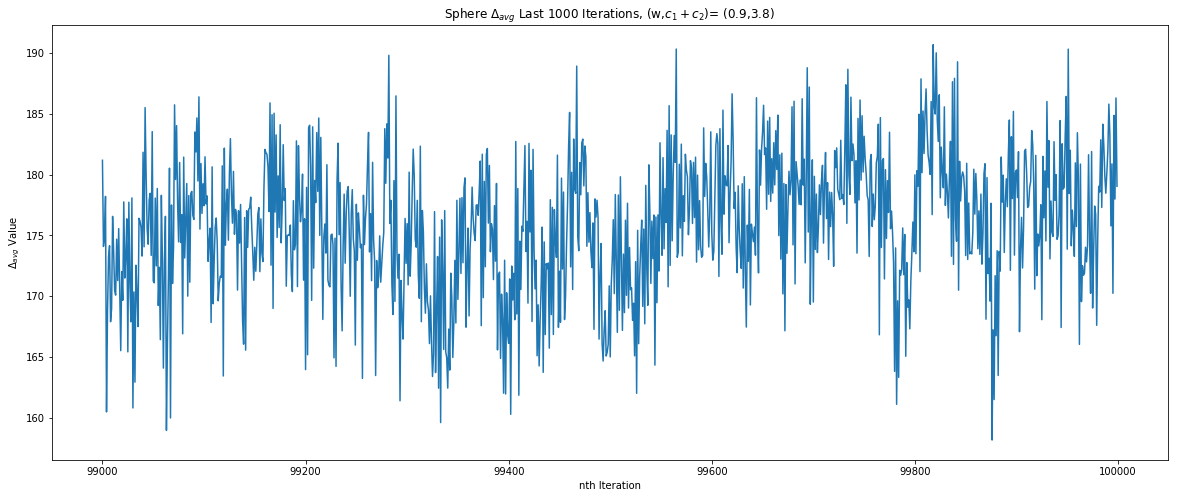

In [15]:
plot_printing_last_1000(sphere_0938,"Sphere")